In [57]:
import matplotlib.pyplot as plt
import dtaidistance
import random
import numpy as np
from scipy.spatial.distance import euclidean
import seaborn as sbn

myseed = 1
random.seed(myseed)
np.random.seed(myseed)

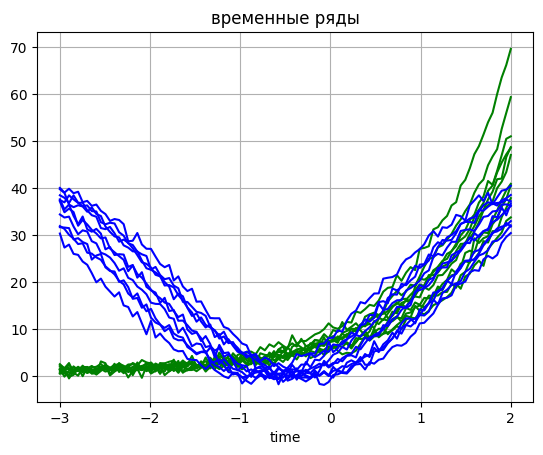

In [58]:
# индекс и отсчет времени в секундах
time_index = np.linspace(-3, 2, 100)

tseries_list = []
step = np.random.random(size=100)

for i in range(10):
    tseries_list.append(np.exp(time_index + 1.5 + step[i]) + 1)
    noise1 = np.random.normal(0, 0.7, len(tseries_list[i]))
    tseries_list[i] += noise1

for i in range(10,20):
    tseries_list.append((np.sin(time_index - 1.5 + step[i]) + 1 ) * 20)
    noise2 = np.random.normal(0, 0.7, len(tseries_list[i]))
    tseries_list[i] += noise2






# отрисовка всех сигналов
for i in range(10):
    plt.plot(time_index, tseries_list[i], '-g')

for i in range(10,20):
    plt.plot(time_index, tseries_list[i], '-b')
            
plt.title(r'временные ряды')
plt.xlabel(r'time')
plt.grid()

In [59]:
import numpy as np

def classLabels(T):
    # Функция для извлечения меток классов из временных рядов
    class_labels = []
    for i in range(len(T)):
        if i < 10:
            class_labels.append(1)  # Предположим, что первые 10 временных рядов принадлежат к классу 1
        else:
            class_labels.append(2)  # Предположим, что оставшиеся 10 временных рядов принадлежат к классу 2
    return class_labels

def generateCandidates(Ti, min_len = 3, max_len = 100):
    # Функция для генерации кандидатов в шейплеты для конкретного временного ряда Ti
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates

def findDistances(S, Wi_l):
    # Функция для вычисления расстояний между текущими лучшими шейплетами и кандидатами шейплетов Wi_l
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

def assessCandidate(S, DS):
    # Функция для оценки качества кандидата шейплета S на основе расстояний DS
    quality = np.mean(np.sqrt(DS))  # Просто среднее расстояние в качестве оценки
    return quality

def removeSelfSimilar(shapelets):
    # Функция для удаления самопохожих шейплетов из списка shapelets
    # Ваша реализация удаления самопохожих шейплетов
    pass

def InsertShapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result

def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = InsertShapelet(result, shapelet)
    return result

def ShapeletCachedSelection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    class_labels = classLabels(tseries_list)
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generateCandidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = findDistances(candidate, candidates)
                quality = assessCandidate(candidate, distances)
                shapelets.append((candidate, quality))
        shapelets.sort(key=lambda x: x[1], reverse=True)
        removeSelfSimilar(shapelets)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets
K_shapletes_exp = ShapeletCachedSelection(tseries_list[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_sin = ShapeletCachedSelection(tseries_list[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_exp)
print(K_shapletes_sin)

[(array([43.73274739, 47.05373735, 50.54551902, 51.07653141]), 8.463302178366368), (array([40.73120845, 43.73274739, 47.05373735, 50.54551902]), 8.15609838681783), (array([41.569976  , 40.73120845, 43.73274739, 47.05373735]), 7.875794861902887), (array([38.2633789 , 41.569976  , 40.73120845, 43.73274739]), 7.608192598581124), (array([36.97644756, 38.2633789 , 41.569976  , 40.73120845]), 7.405919886672941), (array([34.42585377, 36.97644756, 38.2633789 , 41.569976  ]), 7.221658233942541), (array([33.24251843, 34.42585377, 36.97644756, 38.2633789 ]), 6.971092244883709), (array([31.11732223, 33.24251843, 34.42585377, 36.97644756]), 6.761724536363467), (array([30.00559915, 31.11732223, 33.24251843, 34.42585377]), 6.553552524482019), (array([27.71354737, 30.00559915, 31.11732223, 33.24251843]), 6.3574470897278745), (array([26.69946139, 27.71354737, 30.00559915, 31.11732223]), 6.160633022639786), (array([24.99246634, 26.69946139, 27.71354737, 30.00559915]), 5.97747811133477), (array([24.56973

In [60]:
import numpy as np

def classLabels(T):
    # Функция для извлечения меток классов из временных рядов
    class_labels = []
    for i in range(len(T)):
        if i < 10:
            class_labels.append(1)  # Предположим, что первые 10 временных рядов принадлежат к классу 1
        else:
            class_labels.append(2)  # Предположим, что оставшиеся 10 временных рядов принадлежат к классу 2
    return class_labels

def generateCandidates(Ti, min_len = 3, max_len = 100):
    # Функция для генерации кандидатов в шейплеты для конкретного временного ряда Ti
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates

def findDistances(S, Wi_l):
    # Функция для вычисления расстояний между текущими лучшими шейплетами и кандидатами шейплетов Wi_l
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

def assessCandidate(S, DS):
    # Функция для оценки качества кандидата шейплета S на основе расстояний DS
    quality = np.mean(np.sqrt(DS))  # Просто среднее расстояние в качестве оценки
    return quality

def removeSelfSimilar(shapelets):
    # Функция для удаления самопохожих шейплетов из списка shapelets
    # Ваша реализация удаления самопохожих шейплетов
    pass

def InsertShapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result

def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = InsertShapelet(result, shapelet)
    return result

def ShapeletCachedSelection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    class_labels = classLabels(tseries_list)
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generateCandidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = findDistances(candidate, candidates)
                quality = assessCandidate(candidate, distances)
                shapelets.append((candidate, quality))
        shapelets.sort(key=lambda x: x[1], reverse=True)
        removeSelfSimilar(shapelets)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets

In [61]:
K_shapletes_exp = ShapeletCachedSelection(tseries_list[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_sin = ShapeletCachedSelection(tseries_list[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_exp)
print(K_shapletes_sin)

[(array([43.73274739, 47.05373735, 50.54551902, 51.07653141]), 8.463302178366368), (array([40.73120845, 43.73274739, 47.05373735, 50.54551902]), 8.15609838681783), (array([41.569976  , 40.73120845, 43.73274739, 47.05373735]), 7.875794861902887), (array([38.2633789 , 41.569976  , 40.73120845, 43.73274739]), 7.608192598581124), (array([36.97644756, 38.2633789 , 41.569976  , 40.73120845]), 7.405919886672941), (array([34.42585377, 36.97644756, 38.2633789 , 41.569976  ]), 7.221658233942541), (array([33.24251843, 34.42585377, 36.97644756, 38.2633789 ]), 6.971092244883709), (array([31.11732223, 33.24251843, 34.42585377, 36.97644756]), 6.761724536363467), (array([30.00559915, 31.11732223, 33.24251843, 34.42585377]), 6.553552524482019), (array([27.71354737, 30.00559915, 31.11732223, 33.24251843]), 6.3574470897278745), (array([26.69946139, 27.71354737, 30.00559915, 31.11732223]), 6.160633022639786), (array([24.99246634, 26.69946139, 27.71354737, 30.00559915]), 5.97747811133477), (array([24.56973

In [62]:
import random

x = []
Y = []
shpletes_qual = K_shapletes_exp + K_shapletes_sin

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]  
    x.append(res)
    
    if i < len(K_shapletes_exp):
        Y.append(1)
    else:
        Y.append(2)

X_train = []
X_test = []
y_train = []
y_test = []
print(shpletes_qual)

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 0.7)):
    X_train.append(x[indexes[i] - 1])
    y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 0.7), len(Y)):
    X_test.append(x[indexes[i] - 1])
    y_test.append(Y[indexes[i] - 1])

print(X_train)
print(y_train)

print(X_test)
print(y_test)

[(array([43.73274739, 47.05373735, 50.54551902, 51.07653141]), 8.463302178366368), (array([40.73120845, 43.73274739, 47.05373735, 50.54551902]), 8.15609838681783), (array([41.569976  , 40.73120845, 43.73274739, 47.05373735]), 7.875794861902887), (array([38.2633789 , 41.569976  , 40.73120845, 43.73274739]), 7.608192598581124), (array([36.97644756, 38.2633789 , 41.569976  , 40.73120845]), 7.405919886672941), (array([34.42585377, 36.97644756, 38.2633789 , 41.569976  ]), 7.221658233942541), (array([33.24251843, 34.42585377, 36.97644756, 38.2633789 ]), 6.971092244883709), (array([31.11732223, 33.24251843, 34.42585377, 36.97644756]), 6.761724536363467), (array([30.00559915, 31.11732223, 33.24251843, 34.42585377]), 6.553552524482019), (array([27.71354737, 30.00559915, 31.11732223, 33.24251843]), 6.3574470897278745), (array([26.69946139, 27.71354737, 30.00559915, 31.11732223]), 6.160633022639786), (array([24.99246634, 26.69946139, 27.71354737, 30.00559915]), 5.97747811133477), (array([24.56973

In [63]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest()
clf.fit(X_train, y_train)

print("--- Классификатор TimeSeriesForest ---\n")
print(f"Accuracy = {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(np.array(X_test[i]).reshape(1, -1))[0]}")
    print(f"Истинный класс для предсказаний {y_test[i]}\n")

--- Классификатор TimeSeriesForest ---

Accuracy = 1.0
Вектор вероятности принадлежности к классам [0.866 0.134]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.842 0.158]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.08 0.92]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.03 0.97]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.034 0.966]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.186 0.814]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.386 0.614]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.904 0.096]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.978 0.022]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.608 0.392]
Истинный класс для предсказаний 1

Вектор вероятности 